In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import os

In [57]:
def plot_audio_waveforms_single_plot(audio_files):

    plt.figure(figsize=(30, len(audio_files)))

    for i, file in enumerate(audio_files):
        samplerate, data = wavfile.read(file)

        if data.ndim > 1: 
            data = np.mean(data, axis=1)
        data = data / np.max(np.abs(data)) * 0.5        

        duration = len(data) / samplerate
        time = np.linspace(0, duration, len(data))
        
        plt.plot(time, data + len(audio_files) * 2 - i, color='blue')  
        plt.text(-2, len(audio_files) * 2 - i, file.split('\\')[-1].split('.')[0], va='center', ha='right', fontsize=25)

    plt.xlabel("Time (seconds)", fontsize=25)
    plt.xticks(fontsize=20)
    plt.gca().set_yticklabels([])
    plt.gca().set_yticks([]) 
    plt.xlim(left=0)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



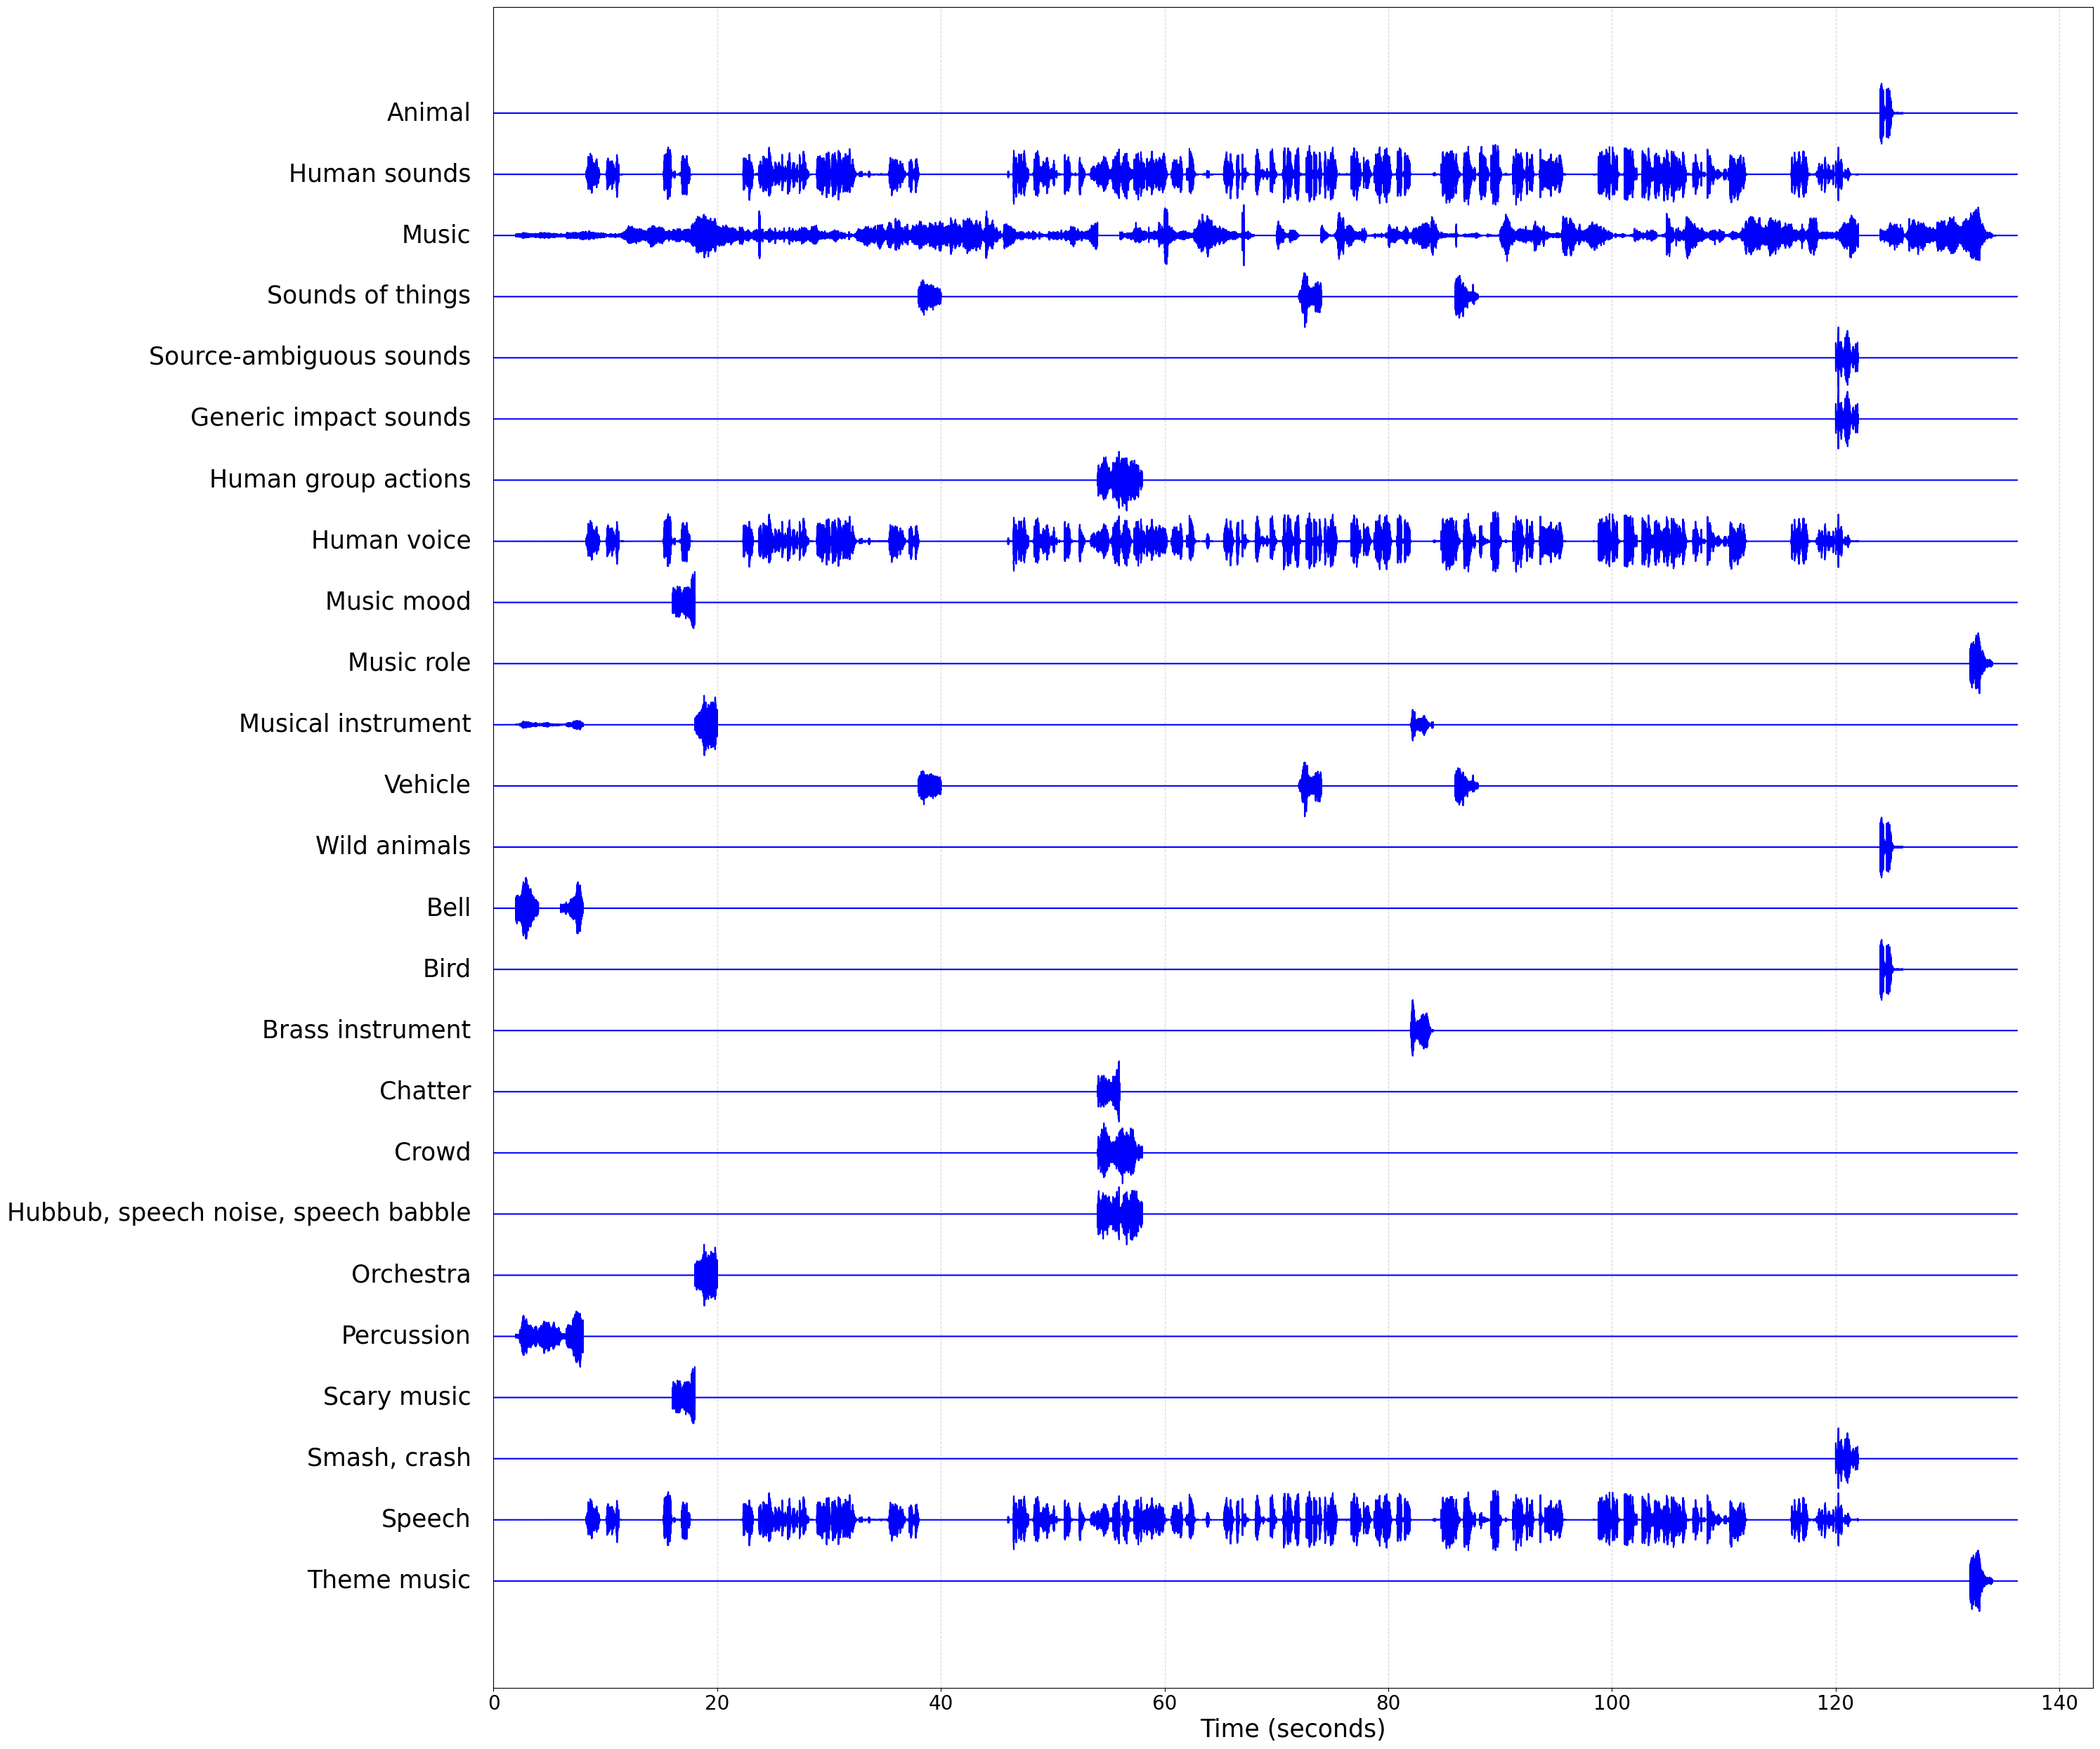

In [58]:
# List of audio file paths
audio_files = []
level_folder = ['level=1', 'level=2', 'level=3']
file_path = 'D:/Research/personal_website/retrocirce.github.io/uss_sep/files/harry_potter'

for level_f in level_folder:
    folder = os.path.join(file_path, level_f)
    files = [os.path.join(folder, d) for d in os.listdir(folder) if d.endswith('.wav')]
    audio_files = audio_files + files

plot_audio_waveforms_single_plot(audio_files)